<a href="https://colab.research.google.com/github/TheArslan23/credit-card-approval-prediction/blob/master/credit%20card%20approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from google.colab import files
uploaded = files.upload()

Saving application_record.csv to application_record.csv


In [4]:
df = pd.read_csv("application_record.csv")

In [5]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
df.shape

(438557, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [8]:
df['ID'].duplicated().sum()

47

In [9]:
# Drop duplicates
#df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df = df.drop_duplicates(subset='ID',keep='first')

In [10]:
df.shape

(438510, 18)

In [11]:
df.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [12]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [13]:
# OHE - CODE_GENDER,FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE

In [14]:
df['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [15]:
df['FLAG_OWN_CAR'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
df['FLAG_OWN_REALTY'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [18]:
df['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [19]:
df['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [20]:
df['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [21]:
df['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [22]:
df['FLAG_WORK_PHONE'].unique()

array([1, 0])

In [23]:
df['FLAG_PHONE'].unique()

array([0, 1])

In [24]:
df['FLAG_EMAIL'].unique()

array([0, 1])

In [25]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [26]:
df['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)
df['OCCUPATION_TYPE'].value_counts(dropna=False)

not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [27]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
DAYS_BIRTH,438510.0,-1.599802e+04,4185.016222,-25201.0,-24013.00,-23642.00,-23413.00,-23181.00,-22972.00,-21982.0,-19484.00,-15630.00,-12514.00,-10519.0,-9889.00,-9655.00,-9343.0,-9011.00,-8575.00,-7489.0
DAYS_EMPLOYED,438510.0,6.056619e+04,138770.072835,-17531.0,-10913.00,-9533.00,-8486.00,-7792.00,-7205.00,-5295.0,-3103.00,-1467.00,-371.00,365243.0,365243.00,365243.00,365243.0,365243.00,365243.00,365243.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0


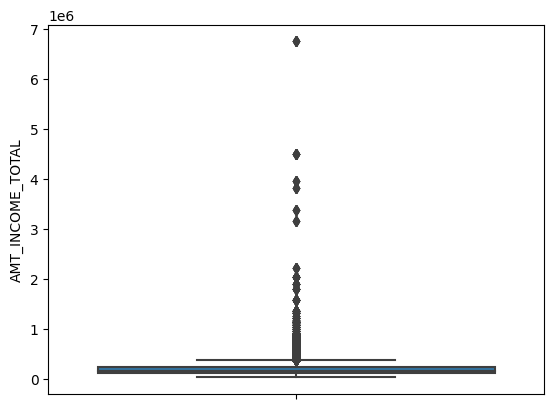

In [28]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

plt.show()

<Axes: ylabel='CNT_CHILDREN'>

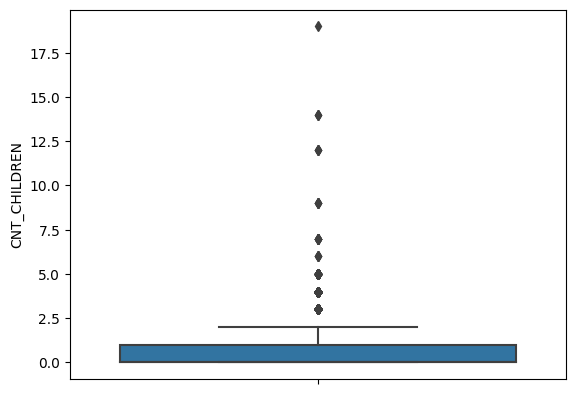

In [29]:
sns.boxplot(data=df, y=df['CNT_CHILDREN'])

In [30]:
df['DAYS_EMPLOYED'].max()

365243

<Axes: ylabel='DAYS_BIRTH'>

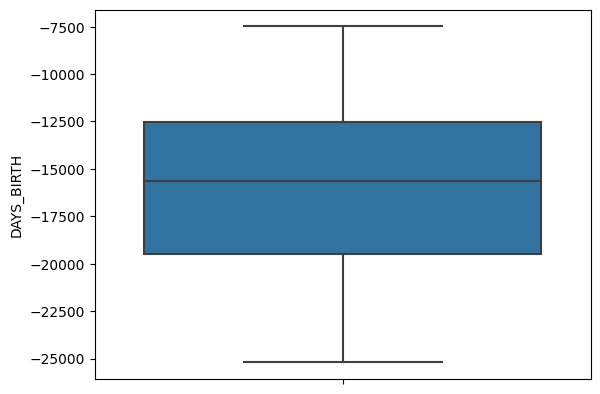

In [31]:
sns.boxplot(data=df, y=df['DAYS_BIRTH'])

<Axes: ylabel='DAYS_EMPLOYED'>

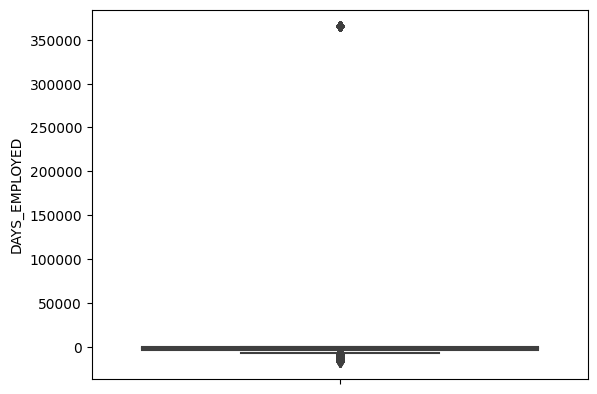

In [32]:
sns.boxplot(data=df, y=df['DAYS_EMPLOYED'])

In [33]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

365243    75324
Name: DAYS_EMPLOYED, dtype: int64

In [34]:
df['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [35]:
df[df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

0    75324
Name: DAYS_EMPLOYED, dtype: int64

In [36]:
df['AGE_YEARS']=round(-df['DAYS_BIRTH']/365.2425,0)
# Create years employed feature
df['YEARS_EMPLOYED']=round(-df['DAYS_EMPLOYED']/365.2425)
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [37]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0
AGE_YEARS,438510.0,4.380453e+01,11.465521,21.0,23.00,25.00,26.00,26.00,27.00,29.0,34.00,43.00,53.00,60.0,63.00,63.00,64.0,65.00,66.00,69.0
YEARS_EMPLOYED,438510.0,5.956069e+00,6.574244,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,4.00,8.00,14.0,20.00,21.00,23.0,26.00,30.00,48.0


In [38]:
df['ID'].duplicated().sum()

0

<Axes: ylabel='AMT_INCOME_TOTAL'>

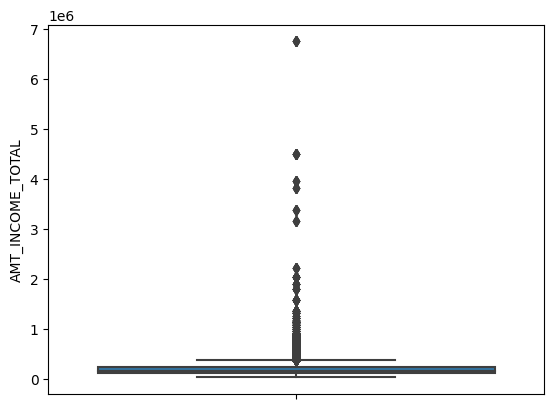

In [39]:
sns.boxplot(df,y='AMT_INCOME_TOTAL')

In [40]:
df[df['AMT_INCOME_TOTAL']>540000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,1.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,1,0,0,1,Managers,3.0,42.0,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Managers,1.0,43.0,5.0
438294,6715605,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0
438295,6715606,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0


In [41]:
df.drop(columns=["FLAG_MOBIL"],inplace=True)

columns_to_scale = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']
st=StandardScaler()

df[columns_to_scale] = st.fit_transform(df[columns_to_scale])
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [42]:
df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,5008804,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5008805,-0.589595,2.179820,-0.216747,-0.942351,0.919336,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5008806,-0.589595,-0.681497,-0.216747,1.325320,-0.449645,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,5008808,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5008809,-0.589595,0.749162,-1.331336,0.714793,0.310900,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,-0.589595,-0.477117,-1.331336,1.586974,-0.905971,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
438553,6840222,-0.589595,-0.763249,-1.331336,0.017048,0.310900,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
438554,6841878,-0.589595,-1.212884,-1.331336,-1.901750,-0.753862,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
438555,6842765,-0.589595,-1.049381,-0.216747,1.325320,-0.905971,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from google.colab import files
uploaded = files.upload()

Saving credit_record.csv to credit_record.csv


In [46]:
df1 = pd.read_csv("credit_record.csv")

In [47]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MONTHS_BALANCE'].plot(kind='hist', bins=20, title='MONTHS_BALANCE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('STATUS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='ID', y='MONTHS_BALANCE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['MONTHS_BALANCE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('STATUS')):
  _plot_series(series, series_name, i)
  fig.legend(title='STATUS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('MONTHS_BALANCE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('STATUS')):
  _plot_series(series, series_name, i)
  fig.legend(title='STATUS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['MONTHS_BALANCE'].plot(kind='line', figsize=(8, 4), title='MONTHS_BALANCE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='ID', y='STATUS', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='MONTHS_BALANCE', y='STATUS', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [48]:
df1.shape

(1048575, 3)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [50]:
df1.duplicated().sum()

0

In [51]:
df1['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [52]:
df1[df1['STATUS'].isin(['X', 'C'])]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [53]:
df1['ID'].nunique()

45985

In [54]:
df1['target']=df1['STATUS']
df1['target'].replace('X', 0, inplace=True)
df1['target'].replace('C', 0, inplace=True)
df1['target']=df1['target'].astype(int)
df1.loc[df1['target']>=1,'target']=1

In [55]:
df2=pd.DataFrame(df1.groupby(['ID'])['target'].agg("max")).reset_index()

In [56]:
df2.sample(10)

,ID,target
3403,5009006,0
29835,5092145,0
5128,5011185,0
31081,5096309,0
39148,5121981,0
41575,5135886,0
27292,5088862,0
442,5002279,1
30434,5095310,0
10950,5024773,0


In [57]:
df2["target"].value_counts()

0    40635
1     5350
Name: target, dtype: int64

In [58]:
new_df=pd.merge(df, df2, how='inner', on=['ID'])

In [59]:
new_df

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [60]:
# Extract how many months account has been open for
start_df=pd.DataFrame(df1.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [61]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [ ]:
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [62]:
new_df

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [63]:
new_df.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'target'], dtype='object')

In [64]:
new_df.drop(columns=["ID"],inplace=True)

In [65]:
x = new_df.drop(columns=['target'])
y = new_df['target']

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,stratify=y,random_state=0)

Logistic Regression

In [69]:
lr = LogisticRegression(random_state=0)

In [70]:
lr.fit(x_train,y_train)

ValueError: could not convert string to float: 'C'

In [71]:
lr.score(x_train,y_train)

ValueError: could not convert string to float: 'C'

In [72]:
lr.score(x_test,y_test)

ValueError: could not convert string to float: 'C'

In [73]:
from sklearn.metrics import confusion_matrix,classification_report

In [74]:
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ValueError: could not convert string to float: 'C'

In [75]:
y_pred1 = lr.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

ValueError: could not convert string to float: 'C'

Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [77]:
dt.fit(x_train,y_train)

ValueError: could not convert string to float: 'C'

In [78]:
dt.score(x_train,y_train),dt.score(x_test,y_test)

ValueError: could not convert string to float: 'C'

In [79]:
params={
    "criterion":["gini", "entropy"],
"max_depth": [5,7,9,10,11],
"min_samples_split" :[10,15,20,50,100,200,250],
"min_samples_leaf" : [5,10,15,20,50,80,100]}

In [80]:
from sklearn.model_selection import RandomizedSearchCV
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=0),param_distributions=params,cv=10,n_jobs=2)
rs_dt.fit(x_train,y_train)

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'C'


In [ ]:
rs_dt.score(x_train,y_train),rs_dt.score(x_test,y_test)

In [ ]:
y_pred = rs_dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [81]:
y_pred1 = rs_dt.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

In [83]:
rf.fit(x_train,y_train)

ValueError: could not convert string to float: 'C'

In [84]:
rf.score(x_train,y_train),rf.score(x_test,y_test)

ValueError: could not convert string to float: 'C'

In [85]:
parameters={"criterion":['gini', 'entropy'],
           "max_depth":[5,7,9,11,13],
           "min_samples_split":[2,5,8,10,15,20],
           "min_samples_leaf":[1,2,5,8,10],
           "n_estimators":[50,100,150,200,300],
           "bootstrap":[True],
           "max_features":["sqrt","log2"],
           "max_samples":[.5,.6,.75,.8,.9]}

In [86]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0),param_distributions=parameters,cv=10,n_jobs=2)
rs_rf.fit(x_train,y_train)

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'C'


In [ ]:
rs_rf.score(x_train,y_train),rs_rf.score(x_test,y_test)

In [ ]:
y_pred = rs_rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [87]:
y_pred1 = rs_rf.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
pd.DataFrame(rf.feature_importances_,rf.feature_names_in_)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)

In [90]:
gb.fit(x_train,y_train)

ValueError: could not convert string to float: 'C'

In [91]:
gb.score(x_train,y_train),gb.score(x_test,y_test)

ValueError: could not convert string to float: 'C'

In [ ]:
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
y_pred1 = gb.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

In [ ]:
## hyperparameter tuning
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [2,5,10,20,50],
    'n_estimators': [10,15,20,30],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5]
}

In [ ]:
rs_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=0),param_distributions=params,cv=10,n_jobs=2)
rs_gb.fit(x_train,y_train)

In [ ]:
y_pred = rs_gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
y_pred1 = rs_gb.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

In [ ]:
rs_gb.best_estimator_

AdaBoost

In [92]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=
                                  DecisionTreeClassifier(random_state=0),
                                  n_estimators=100,
                              random_state=0)

#fit the model on the data and predict the values
model_AdaBoost.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ValueError: could not convert string to float: 'C'

In [ ]:
model_AdaBoost.score(x_train,y_train),model_AdaBoost.score(x_test,y_test)

In [93]:
y_pred = model_AdaBoost.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

AttributeError: 'AdaBoostClassifier' object has no attribute 'n_classes_'

In [ ]:
y_pred1 = model_AdaBoost.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

XGBoost

In [94]:
import xgboost as xgb

In [95]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            eval_metric="logloss", ## this avoids a warning...
                            seed=42,
                            use_label_encoder=False)
clf_xgb.fit(x_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:STATUS: object

In [ ]:
clf_xgb.score(x_train,y_train),clf_xgb.score(x_test,y_test)

In [ ]:
y_pred = clf_xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
y_pred1 = clf_xgb.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

In [ ]:
param_grid = {'max_depth': [3, 4, 5],'learning_rate': [0.1, 0.01, 0.05],
              'gamma': [0, 0.25, 1.0],'reg_lambda': [0, 1.0, 10.0],
              'scale_pos_weight': [1, 3, 5]}
#n_estimators; default is 100 (no. of boosting rounds), subsample, colsample_bytree, alpha

optimal_params = RandomizedSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=0,
                                                          subsample=0.9,colsample_bytree=0.5,early_stopping_rounds=10, eval_metric='auc',
                                                          use_label_encoder=False),param_distributions=param_grid,
                              scoring='roc_auc', verbose=0,cv = 3)#multi:softmax in multiclass problems

optimal_params.fit(x_train,y_train,eval_set=[(x_test, y_test)])

In [ ]:
optimal_params.best_estimator_

In [ ]:
optimal_params.score(x_train,y_train),optimal_params.score(x_test,y_test)

In [ ]:
y_pred = optimal_params.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [96]:
y_pred1 = optimal_params.predict(x_train)
print(confusion_matrix(y_train,y_pred1))
print(classification_report(y_train,y_pred1))

NameError: name 'optimal_params' is not defined